In [1]:
!pip install --upgrade .

Processing /Users/rcheung/Documents/ReinforcementLearning/Easy21
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for easy21: filename=easy21-0.1-py3-none-any.whl size=3123 sha256=a9aace6e42c850364edbc92c31dd114cfe8ddfab8d454713ada1b6ff72755af3
  Stored in directory: /private/var/folders/3w/6q32t1s12pj2t55z6kkp1drr0000gn/T/pip-ephem-wheel-cache-h97s087s/wheels/bf/e1/65/2750196a72b7e303fb63a6b4ae5735ff8aca76e928650d2976
Successfully built easy21
  Attempting uninstall: easy21
    Found existing installation: easy21 0.1
    Uninstalling easy21-0.1:
      Successfully uninstalled easy21-0.1


In [2]:
from environment.easy21 import Easy21
from models.TD_learning import TDLearning
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import time

In [3]:
game = Easy21()

TD learning:

$Q(S, A) \leftarrow Q(S, A) + \alpha (R - \gamma Q(S', A') - Q(S, A))$


Sarsa:

$Q(S, A) \leftarrow Q(S, A) + \alpha (q_t^\lambda(S', A') - Q(S, A))$

where 

$q_t^\lambda = (1-\lambda) \sum_{n=1}^{\infty} \lambda^{n-1}q_t^{(n)}$



In [4]:
N0 = 100
n_iterations = 1000000

t = time.time()

td_learning = TDLearning(N0=N0)
td_learning.train(n_episodes=n_iterations)

print(f'Elapse Time: {time.time()-t}')

Elapse Time: 39.6938271522522


Text(0, 0.5, 'Player sum')

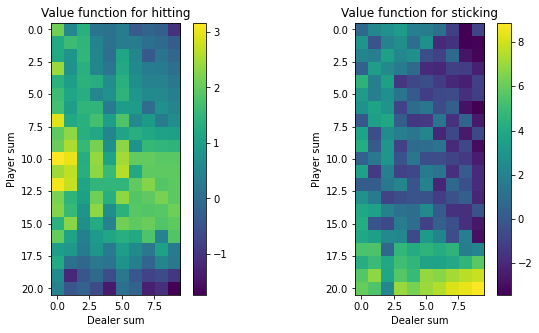

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(td_learning.value['hit'])
plt.colorbar()
plt.title('Value function for hitting')
plt.xlabel('Dealer sum')
plt.ylabel('Player sum')

plt.subplot(122)
plt.imshow(td_learning.value['stick'])
plt.colorbar()
plt.title('Value function for sticking')
plt.xlabel('Dealer sum')
plt.ylabel('Player sum')
